In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's get started by importing Bitcoin and Ether data:

In [3]:
df = pd.read_csv(
    'data/btc-eth-prices-outliers.csv',
    index_col=0, # Use the first column as index
    parse_dates=True
)

In [4]:
df

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


In [5]:
df.head() # checking the first five rows of the dataframe

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


In [6]:
df.tail() # checking the last five rows of the dataframe

,Bitcoin,Ether
Timestamp,,
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82
2018-03-31,6935.480000,394.07
2018-04-01,6794.105000,378.85


And now we can run a simple visualization:

<Axes: xlabel='Timestamp'>

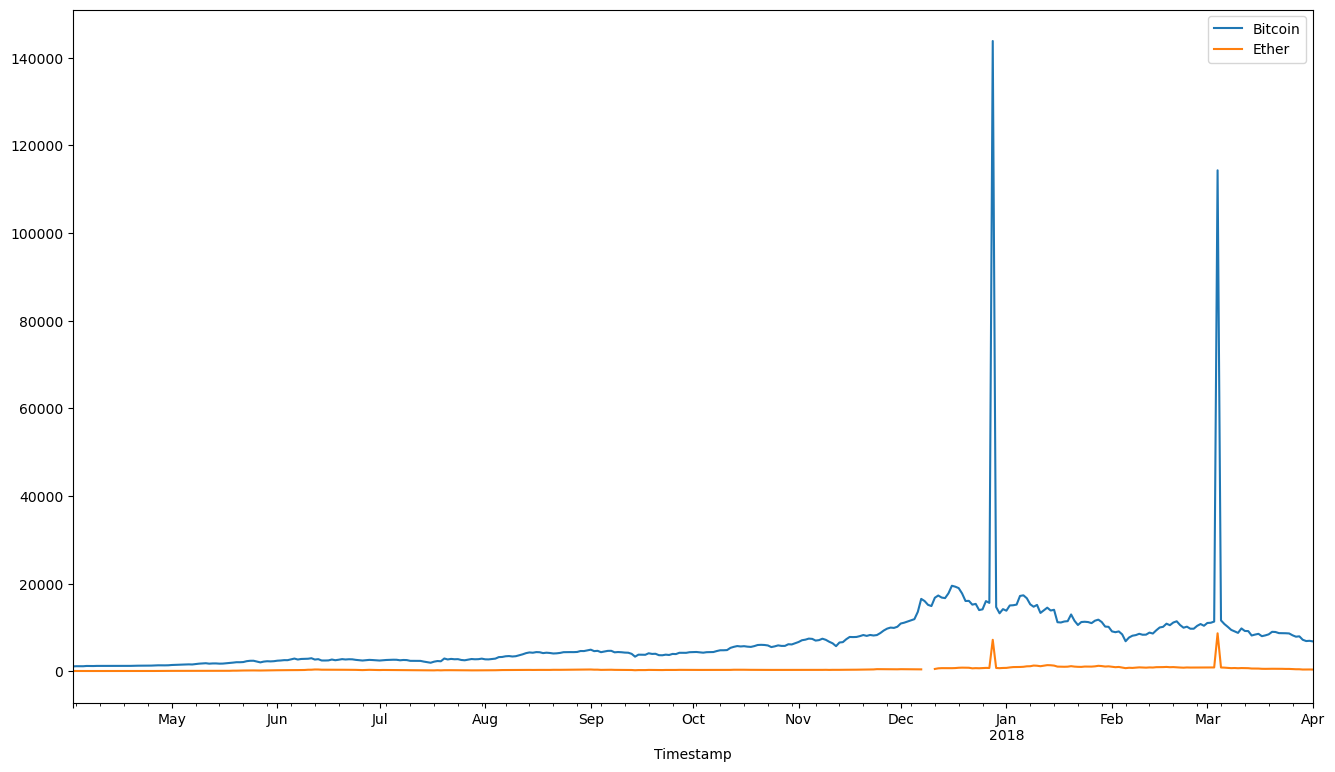

In [7]:
df.plot(figsize=(16, 9))

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and and January 2018:

<Axes: xlabel='Timestamp'>

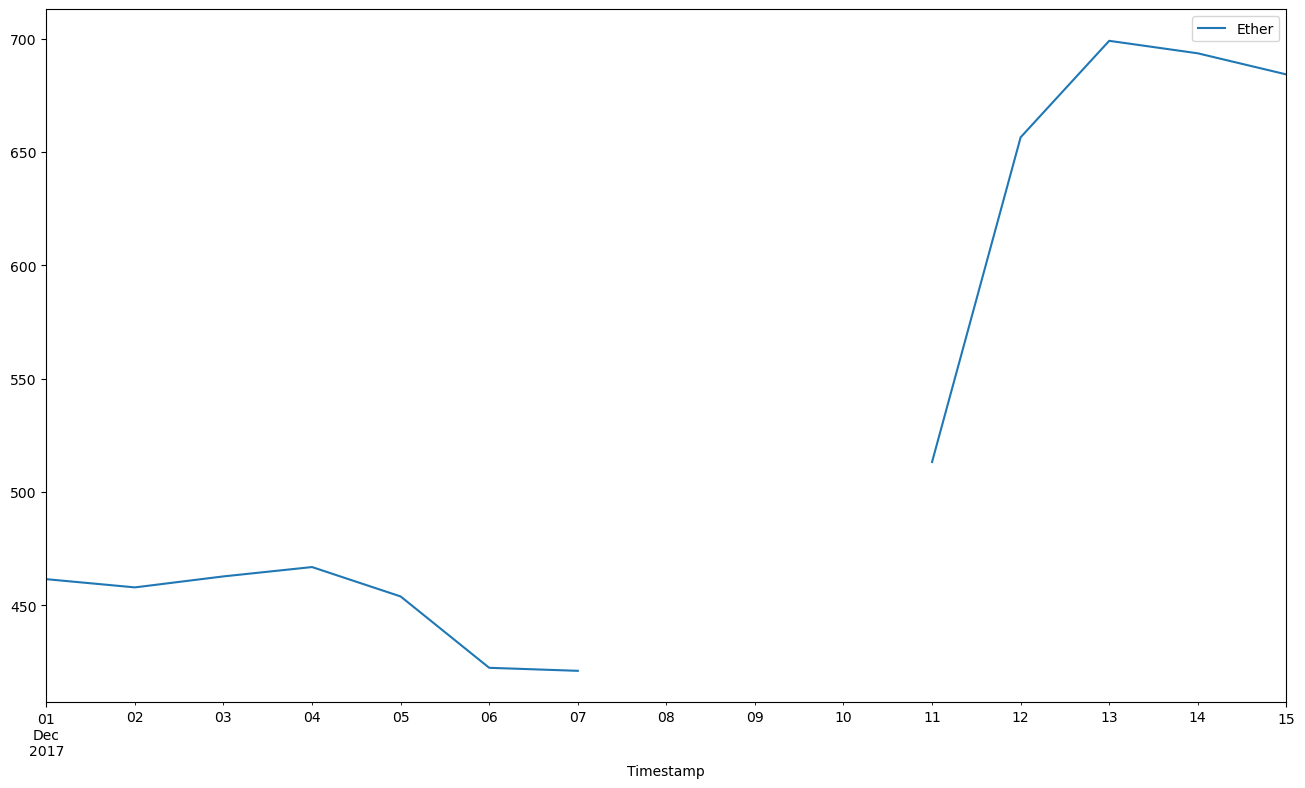

In [8]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [9]:
df_na = df.loc['2017-12': '2017-12-15']

Are those null values?

In [10]:
df_na['Ether'].isna().values.any()

True

When? what periods of time?

In [11]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


We can check that the reason for the missing values is that some values for `ETH` are `NaN`.

In [12]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will be use as fill value? For example: we can use the previous value and just assume the price stayed the same.

In [13]:

df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

C:\Users\User\AppData\Local\Temp\ipykernel_9556\879723105.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [14]:
df.fillna(method='bfill', inplace=True) # Fill the NaN values in the original dataframe

C:\Users\User\AppData\Local\Temp\ipykernel_9556\1552992293.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # Fill the NaN values in the original dataframe


<Axes: xlabel='Timestamp'>

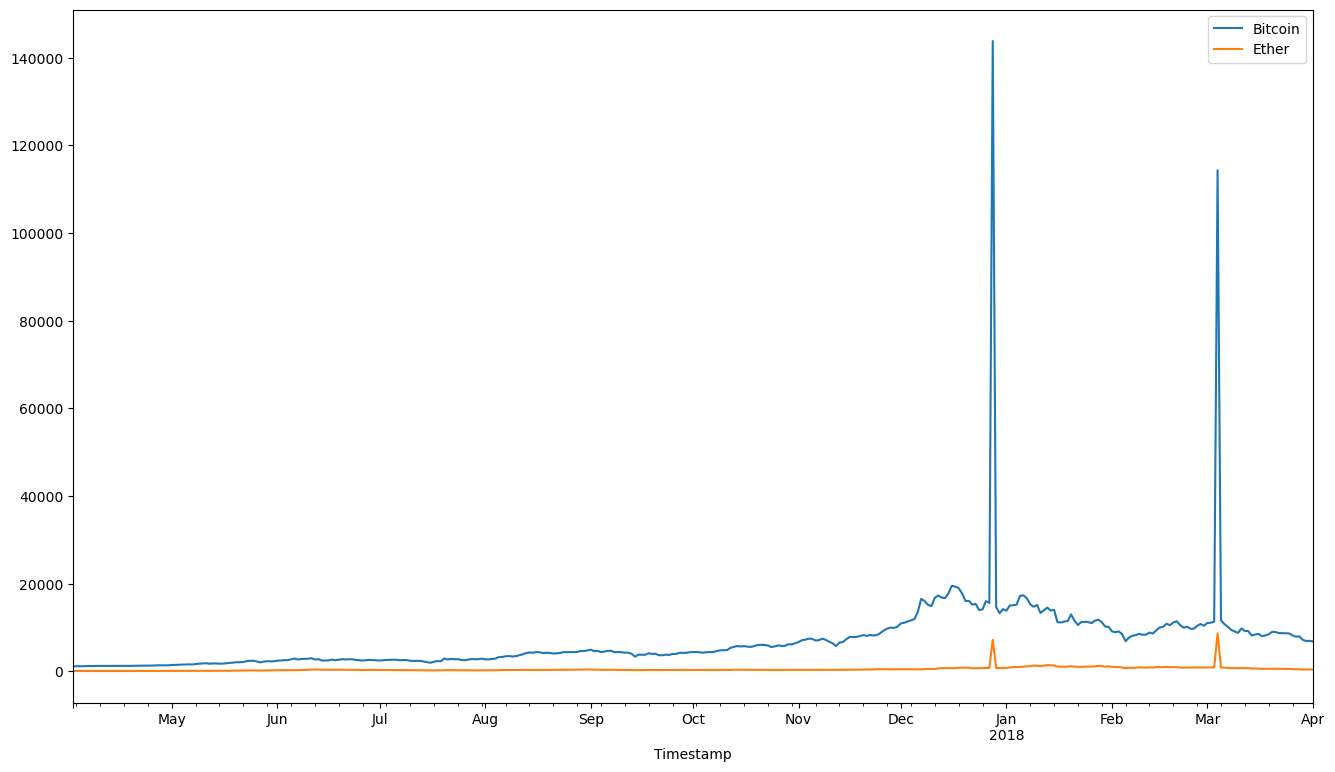

In [15]:
df.plot(figsize=(16, 9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018:

<Axes: xlabel='Timestamp'>

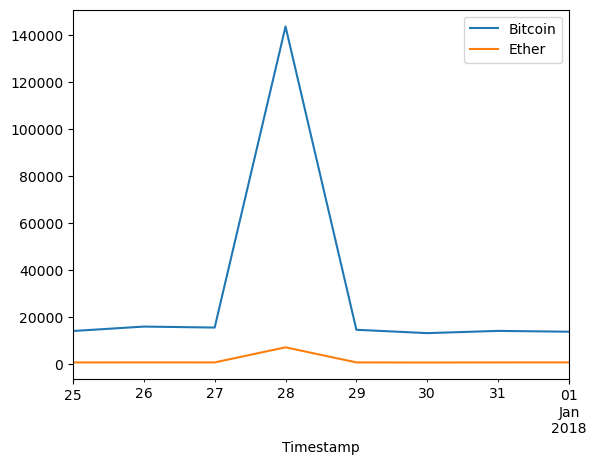

In [16]:
df['2017-12-25':'2018-01-01'].plot() # Plotting the data for a specific date range

<Axes: xlabel='Timestamp'>

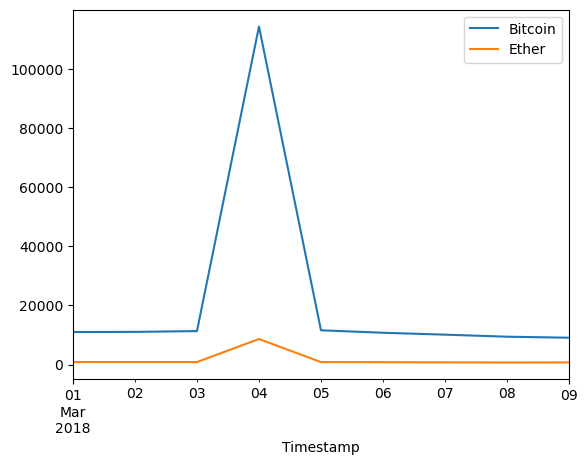

In [17]:
df['2018-03-01': '2018-03-09'].plot()

After checked, we noticed were the two spikes were located specifically. Apparently, they're located in '2017-12-28' and '2018-03-04':

In [18]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04'])) # cleaning the bouth two spikes of the dates

<Axes: xlabel='Timestamp'>

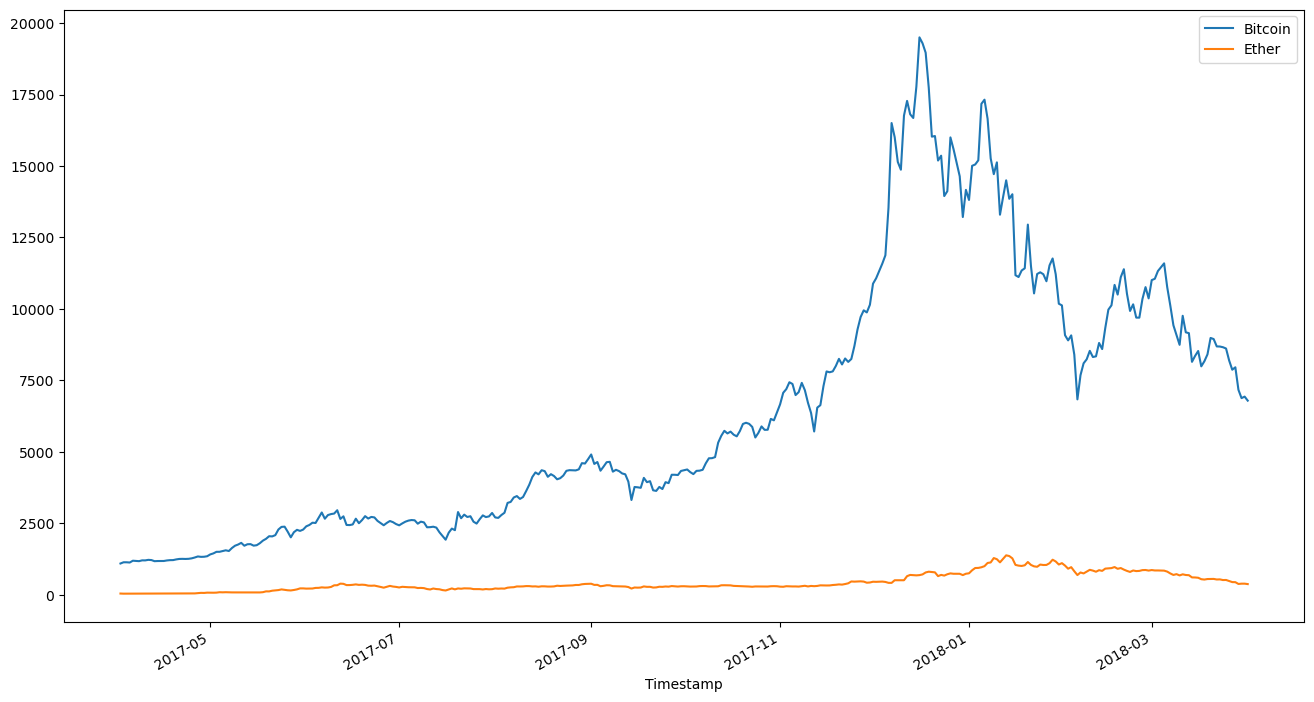

In [19]:
df_cleaned.plot(figsize=(16, 9))

Now it looks much better. Our data seems to be clean.

### **Cleaning Analysis**

Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use analytical methods to identify these outliers or these skewed values.

#### **Central Tendency**

We'll use a set of common indicators of to measure central tendency and identify these outliers:

##### **mean**
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:


In [20]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

Both values seem too high. That's because the outliers are skewing with the mean:

##### **median**

In [21]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

##### **mode**
It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with `df.mode()`.

In [22]:
df.mode() # calculating the mode of the dataframe

,Bitcoin,Ether
0,1099.169125,513.29
1,1133.079314,NaN
2,1141.600363,NaN
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
360,18961.856667,NaN
361,19289.785000,NaN
362,19498.683333,NaN
363,114301.816667,NaN


---

### **Visualizing distribution**

Now we can use a few of the charts that we saw before + `seaborn` to visualize the distribution of our values. In particular, we're interested in **histograms**:

<Axes: ylabel='Frequency'>

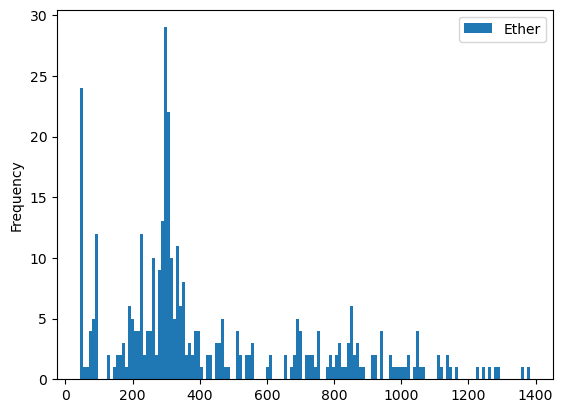

In [23]:
df_cleaned.plot(kind='hist', y='Ether', bins=150) # for Ether Y axis

<Axes: ylabel='Frequency'>

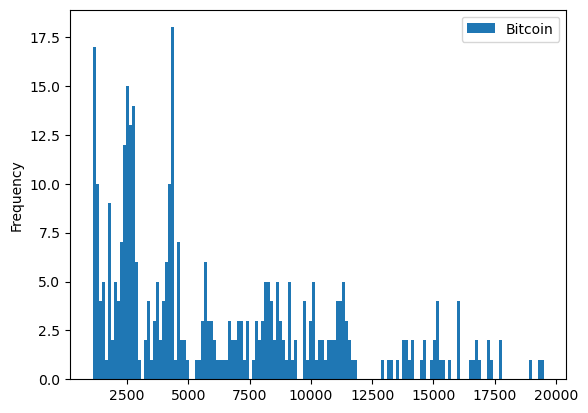

In [24]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150) # for Bitcoin Y axis

Using `seaborn` library, we can create a histogram of our values. The histogram is a great way to visualize the distribution of our data. It shows us how many values fall into each bin. We can also use `seaborn` to create a boxplot, which is another great way to visualize the distribution of our data. The boxplot shows us the median, quartiles, and outliers in our data.

C:\Users\User\AppData\Local\Temp\ipykernel_9556\3777230433.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ether'], ax=ax) # plotting the distribution of Ether prices


<Axes: xlabel='Ether', ylabel='Density'>

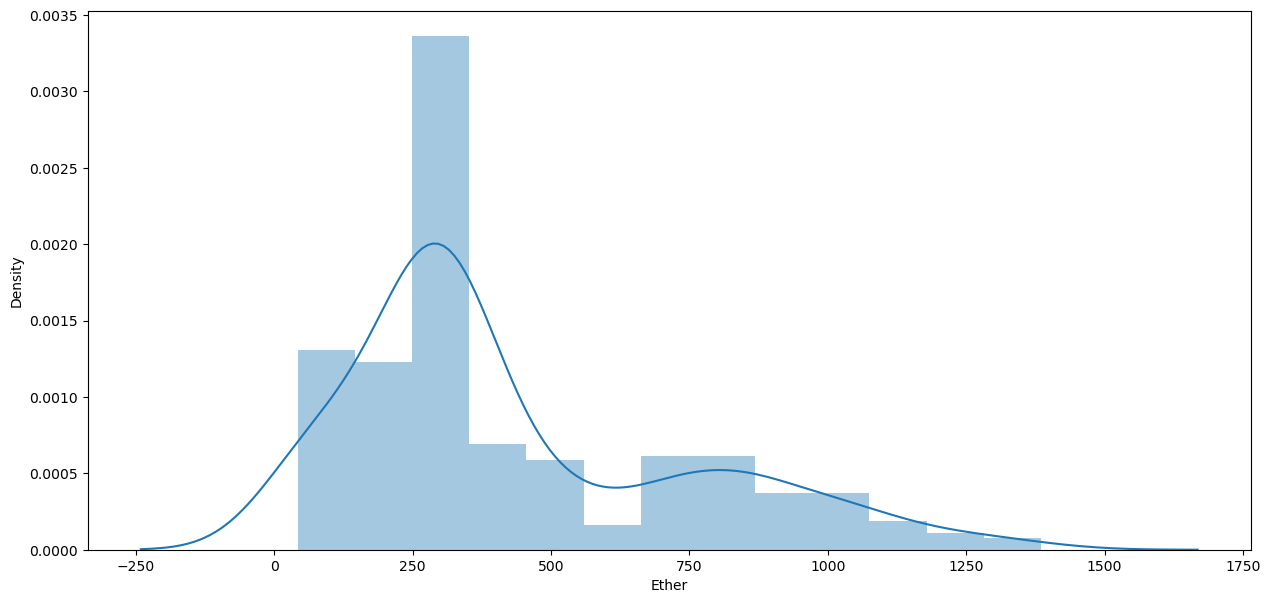

In [25]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax) # plotting the distribution of Ether prices

C:\Users\User\AppData\Local\Temp\ipykernel_9556\3154280580.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax) # plotting the distribution of Bitcoin prices with rug plot


<Axes: xlabel='Bitcoin', ylabel='Density'>

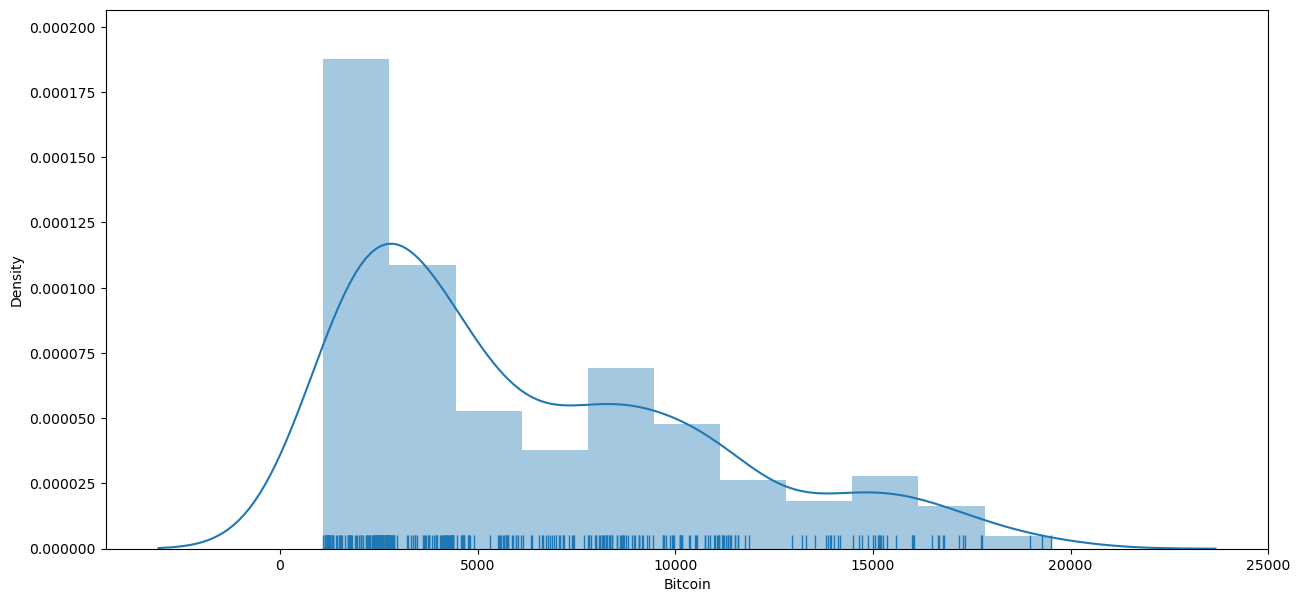

In [26]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax) # plotting the distribution of Bitcoin prices with rug plot

Seaborn's `distplot` is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate:

C:\Users\User\AppData\Local\Temp\ipykernel_9556\3498283146.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax) # plotting the kernel density estimate of Ether prices


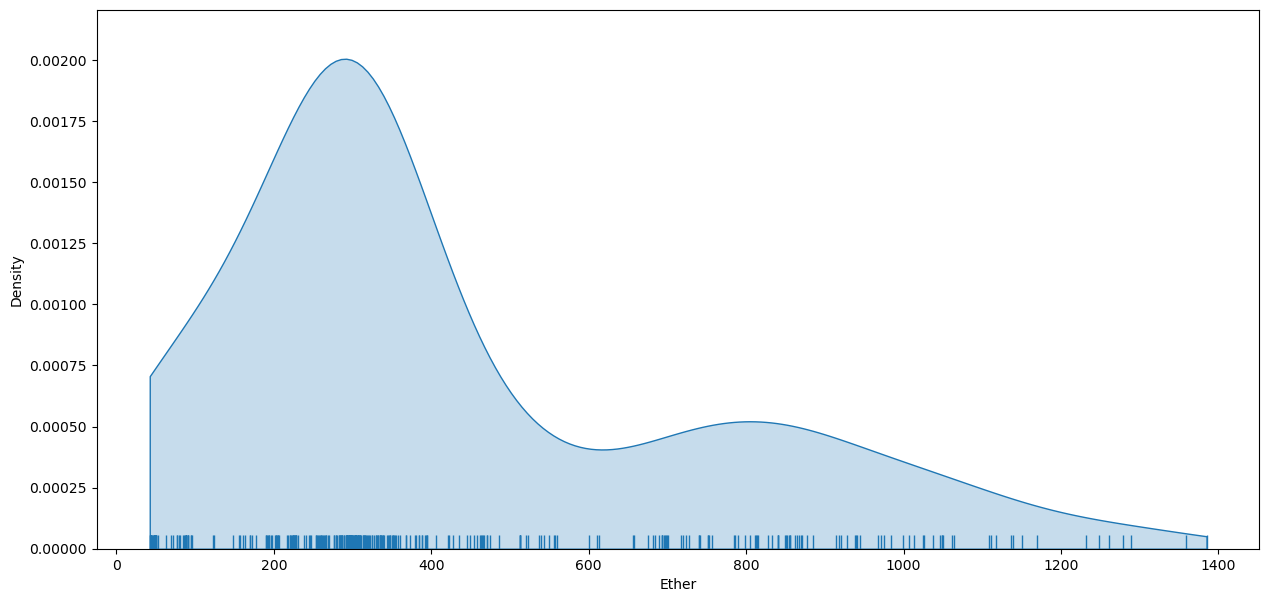

In [27]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax) # plotting the kernel density estimate of Ether prices
sns.rugplot(df_cleaned['Ether'], ax=ax); # adding a rug plot to the KDE plot

We can also visualize a cumulative plot of our distribution:

C:\Users\User\AppData\Local\Temp\ipykernel_9556\2974608538.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax,


<Axes: xlabel='Bitcoin', ylabel='Density'>

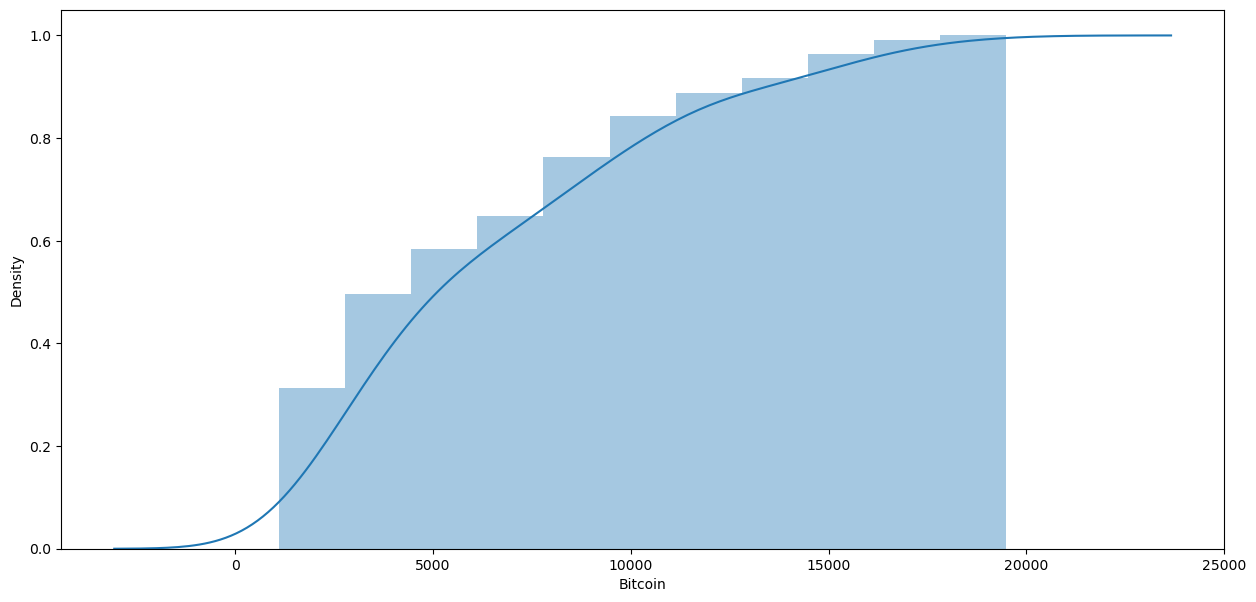

In [28]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True)) # plotting a cumulative distribution of Bitcoin prices

This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

C:\Users\User\AppData\Local\Temp\ipykernel_9556\3451641308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


<Axes: xlabel='Bitcoin', ylabel='Density'>

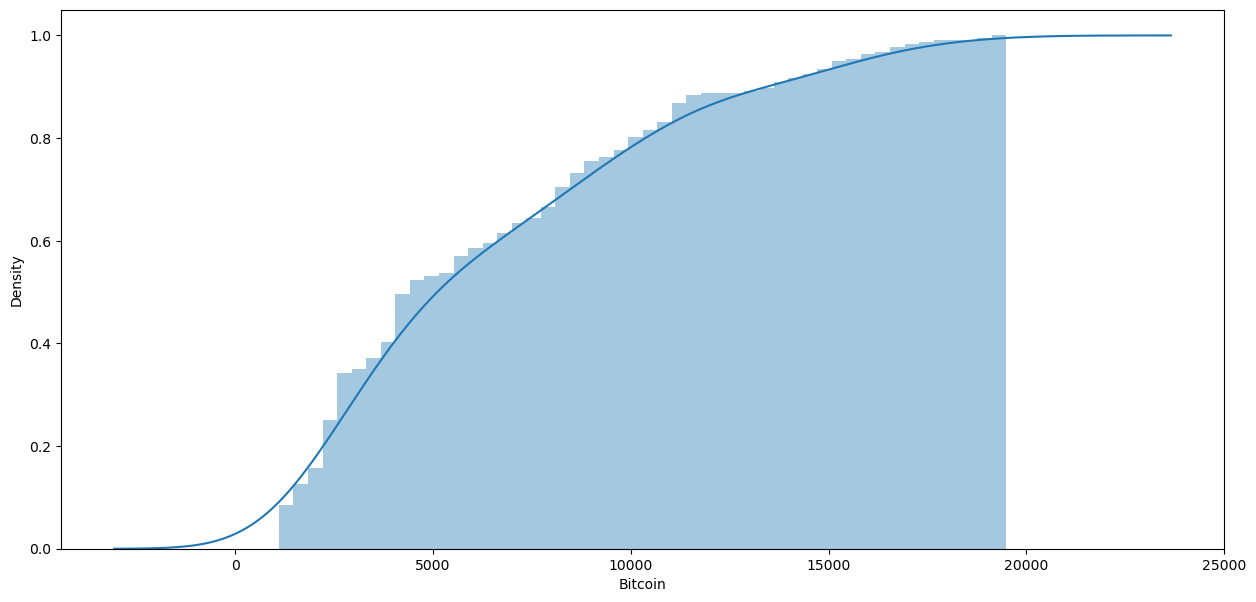

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

---

### **Visualizing bivariate distributions**

The most common way to observe a bivariate distribution is a scatterplot, the jointplot will also include the distribution of the variables:

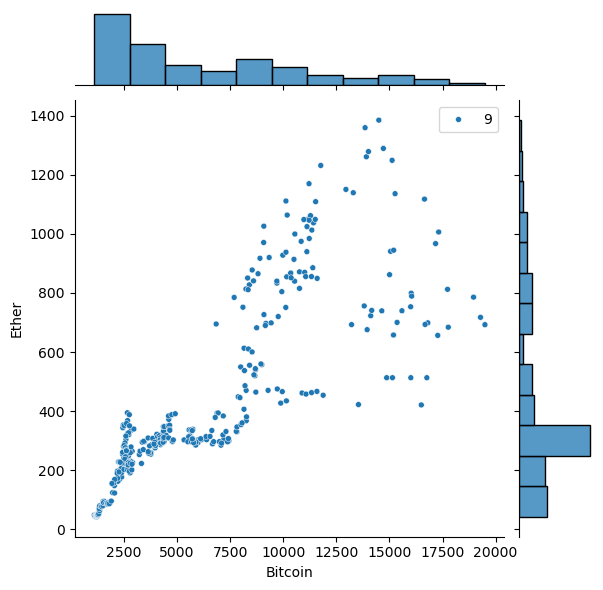

In [30]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9) # plotting a joint distribution of Bitcoin and Ether prices

If you want only a scatter plot, you can use the `regplot` method, that also fits a linear regression model in the plot:

<Axes: xlabel='Bitcoin', ylabel='Ether'>

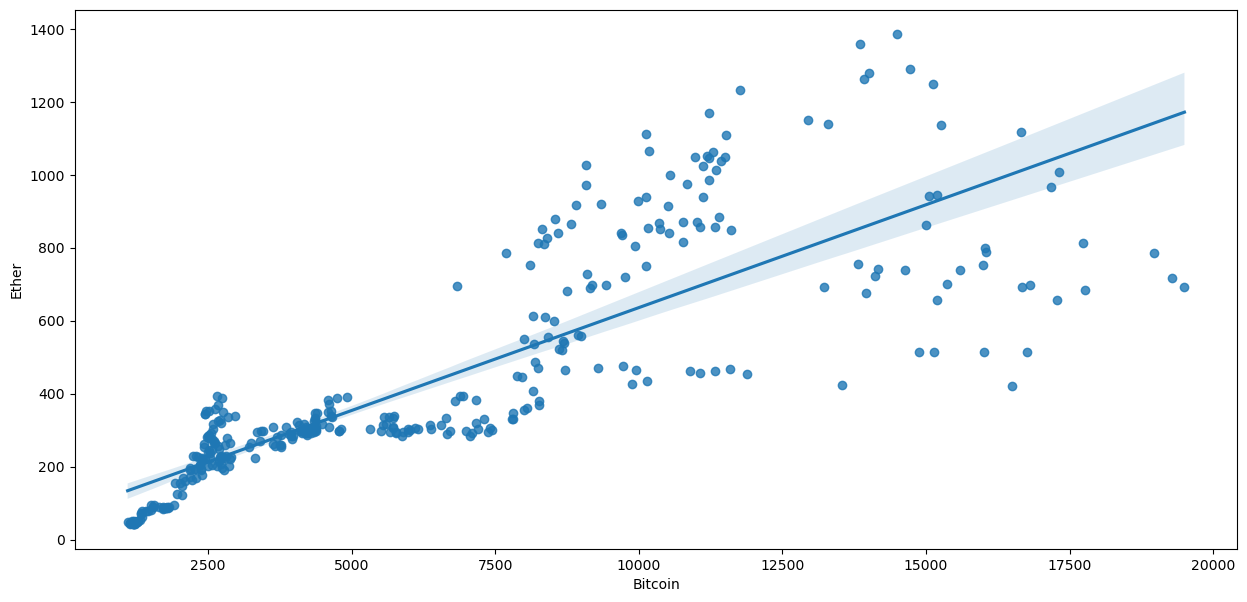

In [31]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

---

### **Quantiles, quartiles and percentiles**

In [32]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

C:\Users\User\AppData\Local\Temp\ipykernel_9556\1203240361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


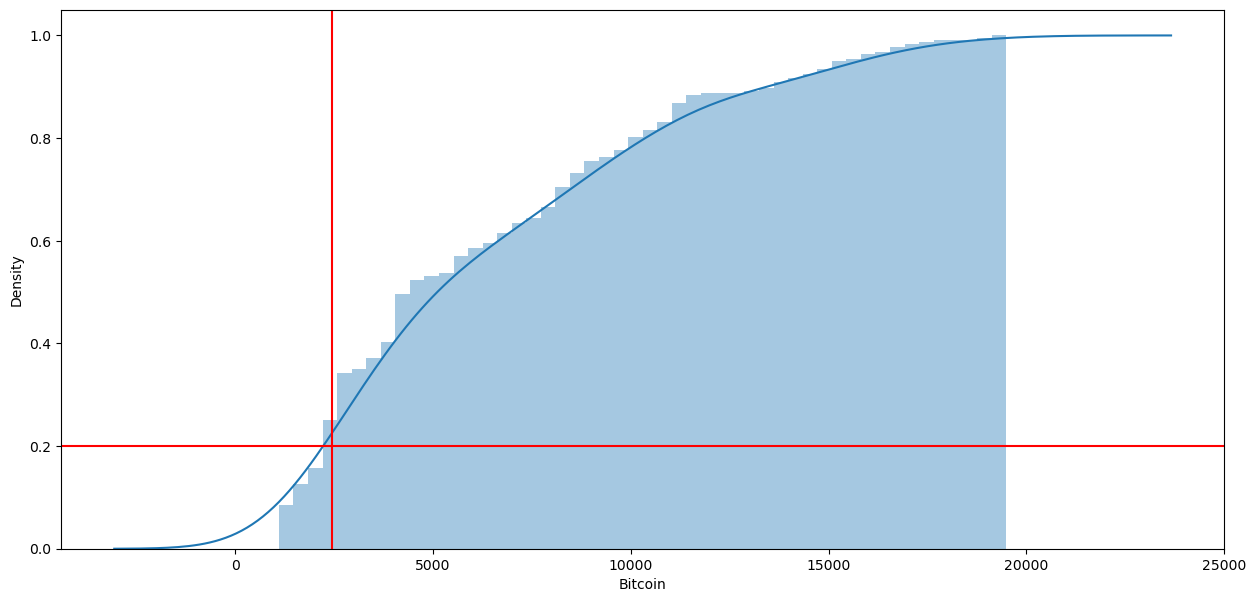

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True), # plotting a histogram with cumulative distribution
             kde_kws=dict(cumulative=True)) # plotting a kernel density estimate with cumulative distribution
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red') # plotting a cumulative distribution of Bitcoin prices with a line at the 20th percentile

In [34]:
df_cleaned['Bitcoin'].quantile(.5) # calculating the 50th percentile (median) of Bitcoin prices

4580.387479999999

In [35]:
df_cleaned['Bitcoin'].median() # calculating the median of Bitcoin prices

4580.387479999999

C:\Users\User\AppData\Local\Temp\ipykernel_9556\1559582923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


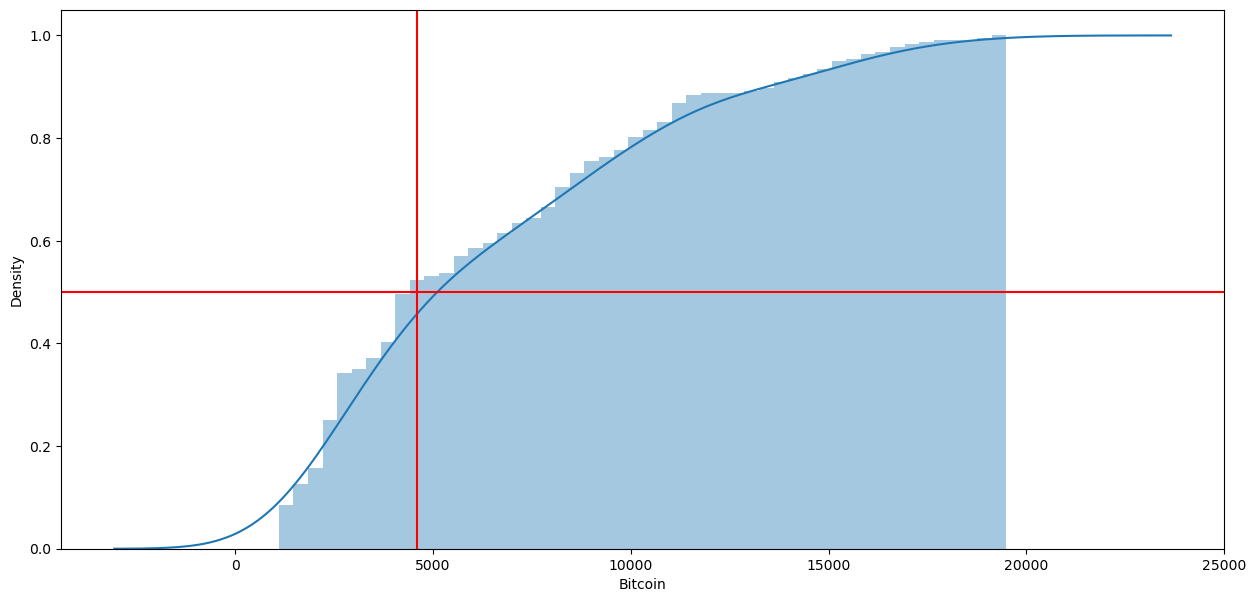

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

C:\Users\User\AppData\Local\Temp\ipykernel_9556\3475303464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,


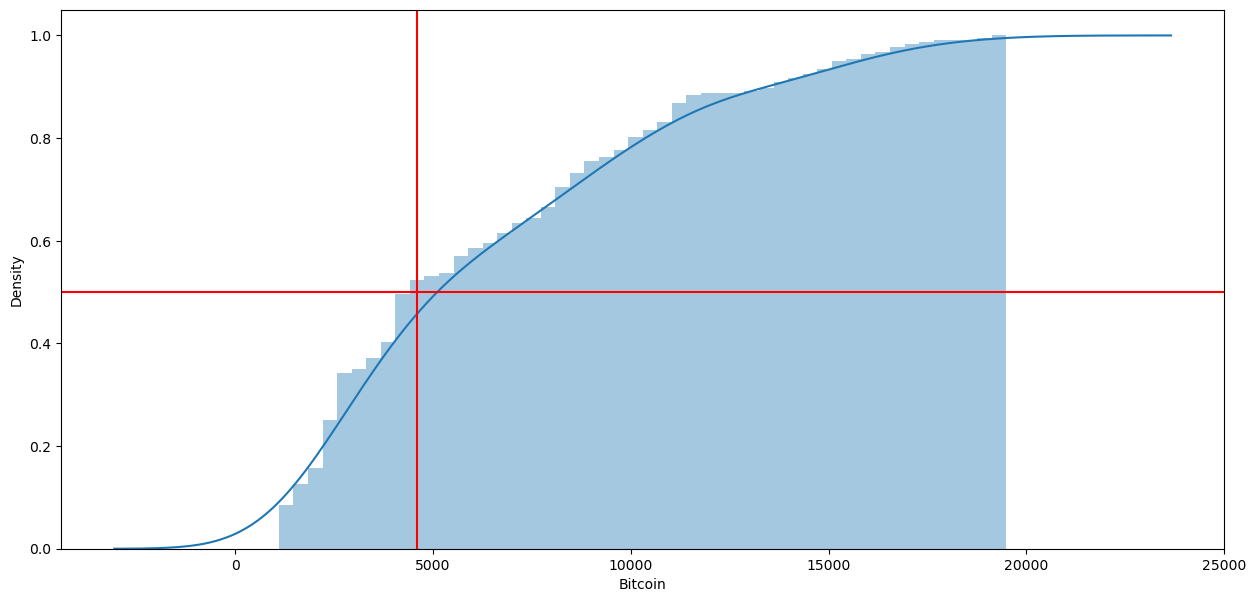

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red') # plotting a cumulative distribution of Bitcoin prices with a line at the median

Quantile `0.25` == Percentile `25%` == Quartile `1st`

---

### **Dispersion**

We'll use a few methods to measure dispersion in our dataset, most of them well known:

* Range
* Variance and Standard Deviation
* Interquartile Range (IQR)

##### **Range**

Range is fairly simple to understand, it's just the max - min values:

In [38]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

Range is **really** sensitive to outliers. As you can see, the range value is extremely high (might indicate the presence of outliers / invalid values).

In [40]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

This value now makes a lot more sense. We know that Bitcoin had a high in about 20k, and it was around 900 when we started measuring. It makes more sense now.

##### **Variance and Standard Deviation**

In [41]:
df['Bitcoin'].var() # calculating the variance of Bitcoin prices

103766537.75278114

In [42]:
df['Bitcoin'].std() # calculating the standard deviation of Bitcoin prices

10186.586167739471

Both variance and std are sensible to outliers as well. We can check with our cleaned dataset:

In [44]:
df_cleaned['Bitcoin'].std() # calculating the standard deviation of cleaned Bitcoin prices

4513.757662530282

##### **IQR**
The [Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) is a good measure of "centered" dispersion, and is calculated as Q3 - Q1 (3rd quartile - 1st quartile).

In [46]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25) # calculating the interquartile range (IQR) of Bitcoin prices

6597.494147619047

In [47]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25) # calculating the IQR of cleaned Bitcoin prices

6548.249242559523

As you can see, `IQR` is more robust than std or range, because it's not so sensitive to outliers

---

### **Analytical Analysis of invalid values**

We can now use the measurements we've seen to analyze those values that seem invalid.

Using `std`: **Z scores**

We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [48]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [49]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.176357301683
Lower Limit: -13377.168313656202


C:\Users\User\AppData\Local\Temp\ipykernel_9556\1109975596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)


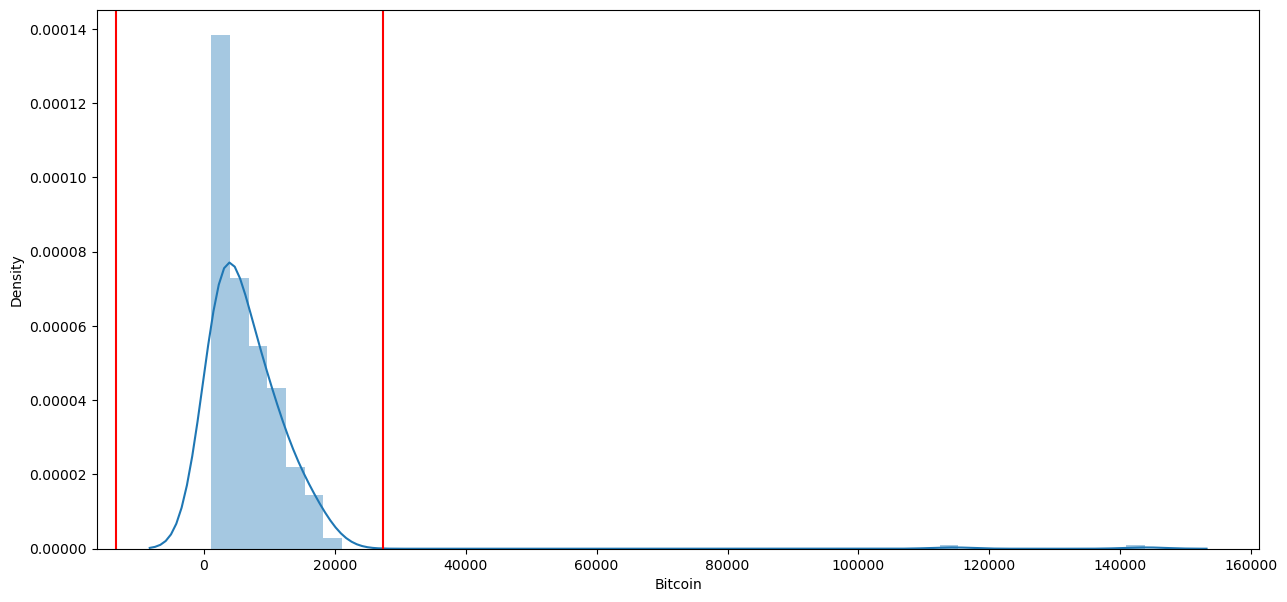

In [50]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Seems like this is a good measurement. Our lower limit doesn't make a lot of sense, as negative values are invalid. But our upper limit has a really good measure. Anything above $27,369 is considered to be an invalid value. Pretty accurate.

##### **Using IQRs**

We can use the IQR instead of std if we think that the standard deviation might be too affected by the outliers/invalid values.

In [51]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [52]:

upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [53]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


C:\Users\User\AppData\Local\Temp\ipykernel_9556\1109975596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)


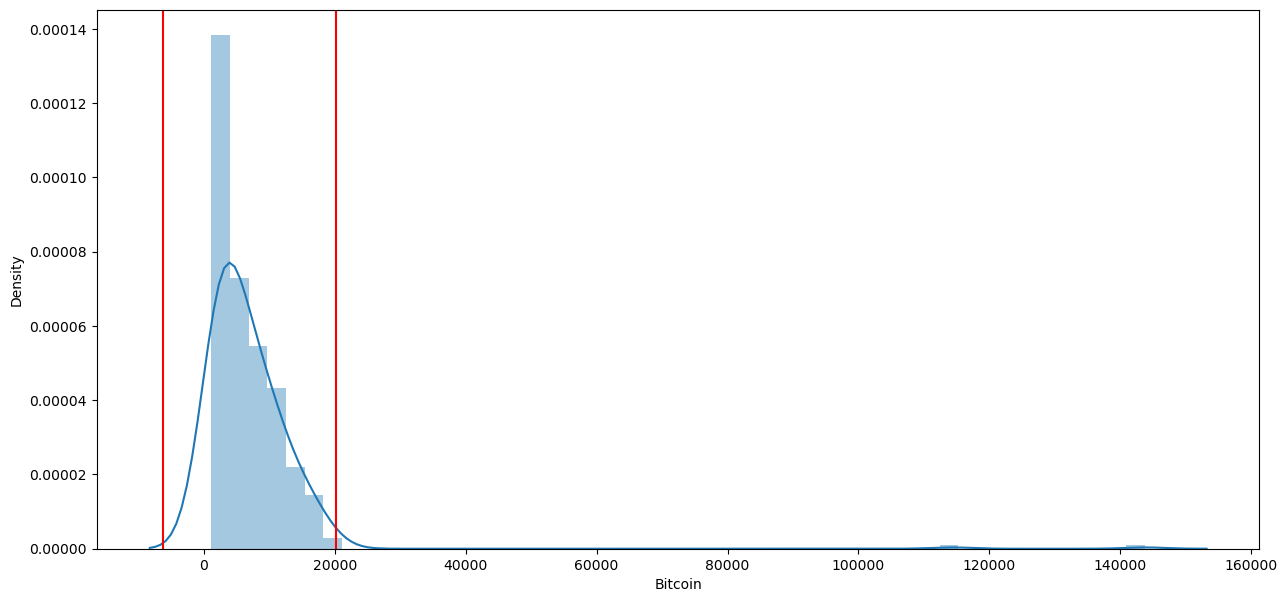

In [54]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

---

##### **Cleaning invalid values analytically**

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [56]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std() # calculating the upper limit for outliers 

<Axes: xlabel='Timestamp'>

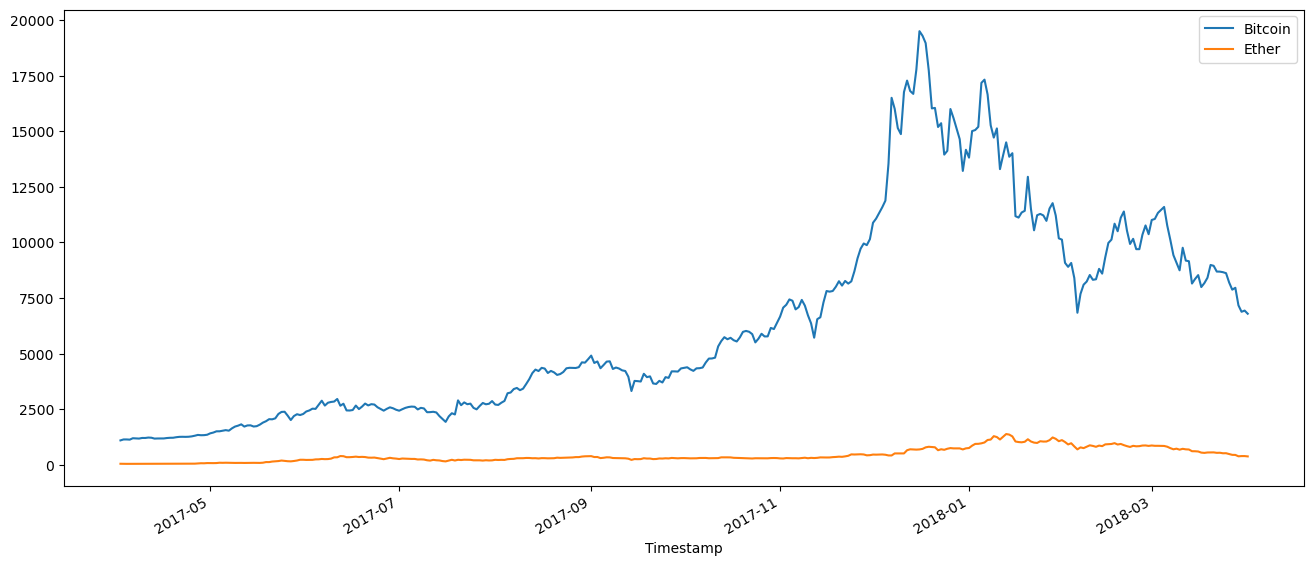

In [57]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

<Axes: xlabel='Timestamp'>

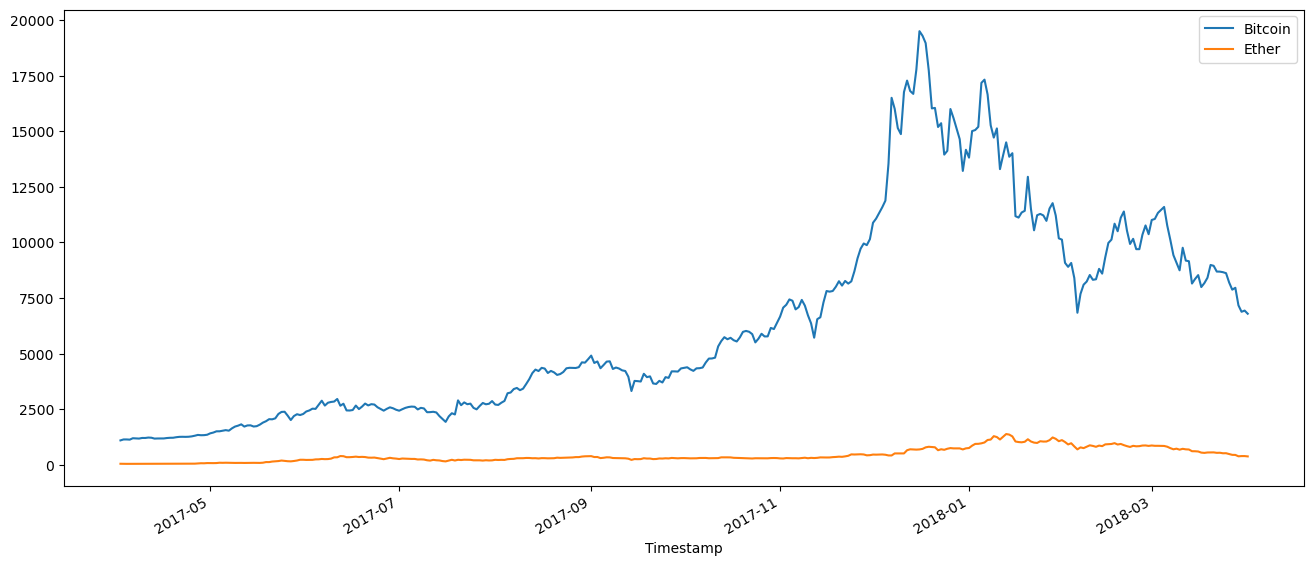

In [59]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7)) # dropping the outliers from the dataframe